In [1]:
import sympy
from sympy.physics.quantum import TensorProduct
from sympy import Matrix,symbols,pprint,factor,expand,simplify,I
sympy.init_printing()
import pandas as pd

These are helper functions to 
- find the simultaneous eigenvectors of a set of operators
- extract components in a basis
- expand tensor products

In [2]:
from npp.linalg import findBasis,getComponents
from npp.linalg import TensorExpand as ex

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


This defines the variables I need

In [3]:
A,B,C,D,E,F,G,H,J,K,L,M,a,b,c,d,x,y = symbols('A,B,C,D,E,F,G,H,J,K,L,M,a,b,c,d,x,y') # I should be kept for the imaginary unit
v11,v12,v13,v21,v22,v23,v31,v32,v33=symbols('v11,v12,v13,v21,v22,v23,v31,v32,v33')
w11,w12,w13,w21,w22,w23,w31,w32,w33=symbols('w11,w12,w13,w21,w22,w23,w31,w32,w33')
u11,u12,u13,u21,u22,u23,u31,u32,u33=symbols('u11,u12,u13,u21,u22,u23,u31,u32,u33')
One,Two,OneP,TwoP=sympy.symbols("|1\\rangle,|2\\rangle,|1'\\rangle,|2'\\rangle",commutative=False)
Plus,Minus,PlusP,MinusP=symbols("Plus,Minus,PlusP,MinusP",commutative=False)
a1,b1,a2,b2,c1,c2,c3,c4=symbols("a1,b1,a2,b2,c1,c2,c3,c4",commutative=True)


# Tensor product

we can see that the tensor product has the form we expect

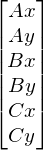

In [4]:
v=Matrix([[A],[B],[C]])
w=Matrix([[x],[y]])
vw=TensorProduct(v,w)
vw

We construct the tensor product of $O$ and $P$

$T=O\otimes P$

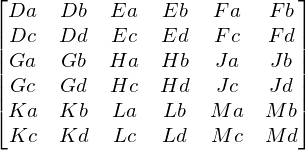

In [5]:
O=Matrix([[D,E,F],[G,H,J],[K,L,M]])
P=Matrix([[a,b],[c,d]])
T=TensorProduct(O,P)
T

Here we check that the tensor product of two operators has the right property, namely:

$T \,(v\otimes w) = (Ov)\otimes (Pw)$

In [6]:
pprint (expand(T*vw)==expand(TensorProduct(O*v,P*w)))
pprint((factor(T*vw),TensorProduct(O*v,P*w)))

True
⎛⎡(a⋅x + b⋅y)⋅(A⋅D + B⋅E + C⋅F)⎤, ⎡(a⋅x + b⋅y)⋅(A⋅D + B⋅E + C⋅F)⎤⎞
⎜⎢                             ⎥  ⎢                             ⎥⎟
⎜⎢(c⋅x + d⋅y)⋅(A⋅D + B⋅E + C⋅F)⎥  ⎢(c⋅x + d⋅y)⋅(A⋅D + B⋅E + C⋅F)⎥⎟
⎜⎢                             ⎥  ⎢                             ⎥⎟
⎜⎢(a⋅x + b⋅y)⋅(A⋅G + B⋅H + C⋅J)⎥  ⎢(a⋅x + b⋅y)⋅(A⋅G + B⋅H + C⋅J)⎥⎟
⎜⎢                             ⎥  ⎢                             ⎥⎟
⎜⎢(c⋅x + d⋅y)⋅(A⋅G + B⋅H + C⋅J)⎥  ⎢(c⋅x + d⋅y)⋅(A⋅G + B⋅H + C⋅J)⎥⎟
⎜⎢                             ⎥  ⎢                             ⎥⎟
⎜⎢(a⋅x + b⋅y)⋅(A⋅K + B⋅L + C⋅M)⎥  ⎢(a⋅x + b⋅y)⋅(A⋅K + B⋅L + C⋅M)⎥⎟
⎜⎢                             ⎥  ⎢                             ⎥⎟
⎝⎣(c⋅x + d⋅y)⋅(A⋅K + B⋅L + C⋅M)⎦  ⎣(c⋅x + d⋅y)⋅(A⋅K + B⋅L + C⋅M)⎦⎠


# SU(2)

These are our two states

In [7]:
psi1=a1*One+b1*Two
psi2=a2*One+b2*Two
(psi1,psi2) 

This is the combination of the two states

In [8]:
combined=ex(TensorProduct(psi1,psi2))
combined

We change the basis from $|1\rangle\otimes|2\rangle,|2\rangle\otimes |1\rangle$ to 

$|+\rangle=\frac{1}{2}\left(|1\rangle\otimes|2\rangle+|2\rangle\otimes |1\rangle\right)$

$|-\rangle=\frac{1}{2}\left(|1\rangle\otimes|2\rangle-|2\rangle\otimes |1\rangle\right)$

In [9]:
rule=[
    (TensorProduct(One,Two),(Plus+Minus)/sympy.sqrt(2)),
    (TensorProduct(Two,One),(Plus-Minus)/sympy.sqrt(2))
]
combinedPM=ex(combined.subs(rule))

These are the components in terms of the new basis:

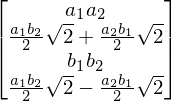

In [10]:
basis=[
    TensorProduct(One,One),
    Plus,
    TensorProduct(Two,Two),
    Minus
]
components=getComponents(combinedPM,basis)
components

I would like to be able to identify these combinations of $a_i$ and $b_i$ as the components of this four dimensional vector, so I create a rule for the $a_ib_j$ products as a function of the components $c_1,c_2,c_3,c_4$. This is the rule: 

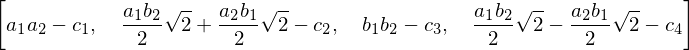

In [11]:
eqs=[ comp-cc for comp,cc in zip(components,[c1,c2,c3,c4]) ]
eqs

In [12]:
abprods=[a1*a2,b1*b2,a1*b2,a2*b1]
abprods

In [13]:
abTOc=sympy.solve(eqs,abprods)
pprint (abTOc)

⎧                  √2⋅(c₂ + c₄)         √2⋅(c₂ - c₄)           ⎫
⎨a₁⋅a₂: c₁, a₁⋅b₂: ────────────, a₂⋅b₁: ────────────, b₁⋅b₂: c₃⎬
⎩                       2                    2                 ⎭


Now we are ready to transform the two states $\psi_1$ and $\psi_2$ (it's easier to do on the combined state before the change to the basis with the + and - combination )

In [14]:
transform=[
    (One,u11*OneP+u21*TwoP),
    (Two,u12*OneP+u22*TwoP)
]
transformed=ex(combined.subs(transform))
transformed

We also want to have the transformed wxpression in terms of the + and - combination

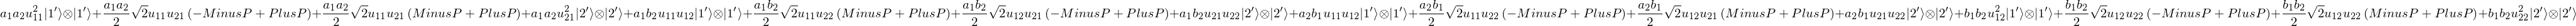

In [15]:
ruleP=[
    (TensorProduct(OneP,TwoP),(PlusP+MinusP)/sympy.sqrt(2)),
    (TensorProduct(TwoP,OneP),(PlusP-MinusP)/sympy.sqrt(2))
]
transformedPM=transformed.subs(ruleP)
transformedPM

again we want to extract the components in the new basis: 

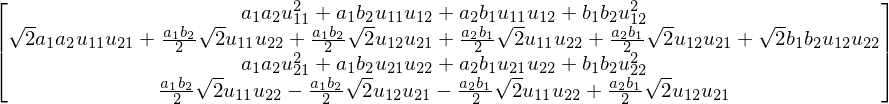

In [16]:
basisP=[
    TensorProduct(OneP,OneP),
    PlusP,
    TensorProduct(TwoP,TwoP),
    MinusP
]
componentsNew=getComponents(transformedPM,basisP)
componentsNew

This is a bit messy but looks much better if we write the $a_ib_j$ coefficients in terms of the components $c_i$ of the vector in the 4-dimensional space:

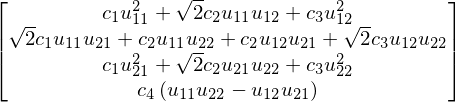

In [17]:
componentsNew=simplify(componentsNew.subs(abTOc))
componentsNew

We can express the new result in terms of a matrix multiplying the old components

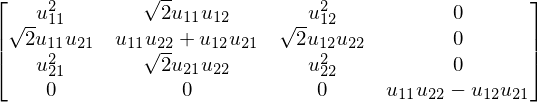

In [18]:
U=Matrix([[comp.coeff(cc) for cc in [c1,c2,c3,c4]] for comp in componentsNew])
U

We can check that this is indeed the right matrix

In [19]:
pprint(simplify(U*Matrix([[c1],[c2],[c3],[c4]])-componentsNew)==Matrix([[0],[0],[0],[0]]))

True


In this matrix we can now identify the three first lines and columns forming one block of states transforming into each other: the triplet, and a state on its own: the singlet. The factor multiplying it in the matrix is equal to the determinant of the transformation matrix $U$ which we know is $1$

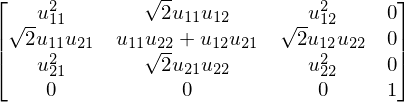

In [20]:
U.subs(u11*u22-u12*u21,1)

# Spin 1/2

Spin 1/2 particles are an example of SU(2) symmetry. We have two spin states, normally called "spin up" and "spin down" in one basis. 

These are the spin operators:

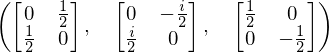

In [21]:
ii=Matrix([[1,0],[0,1]])
s1=Matrix([[0,1],[1,0]])/2
s2=Matrix([[0,-I],[I,0]])/2
s3=Matrix([[1,0],[0,-1]])/2
s1,s2,s3

We now consider a system with two spin 1/2 particles, the components of the total spin are given by the sum of the spin operator applied to each individual spin state

$J(\psi_1\otimes \psi_2) = (S_1 \psi)\otimes \psi_2 + \psi_1\otimes (S_2\psi_2)$

this can be written as one operator acting on the tensor product state: 

$J(\psi_1\otimes \psi_2) =\left(S_1 \otimes \mathbf{1} + \mathbf{1}\otimes S2\right) (\psi_1\otimes \psi_2)$

where $\mathbf{1}$ is the identity matrix.


In [22]:
Jx= TensorProduct(ii,s1)+TensorProduct(s1,ii)
Jy= TensorProduct(ii,s2)+TensorProduct(s2,ii)
Jz= TensorProduct(ii,s3)+TensorProduct(s3,ii)

The operator $J^2$ is given by
$J^2=J_x^2+J_y^2+J_z^2$

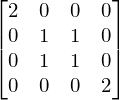

In [23]:
JJ=Jx**2+Jy**2+Jz**2
JJ

We want to find a basis where $J^2$ and $J_z$ are diagonal:

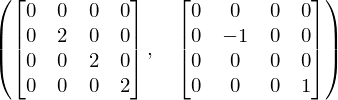

In [24]:
SS=findBasis(JJ,Jz)
SS.inv()*JJ*SS,SS.inv()*Jz*SS

The components of the basis vector are given by the columns of the matrix $SS$

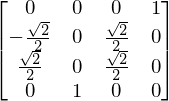

In [25]:
SS

We see that the first eigenvector is the antisymmetric combination of $\uparrow\downarrow$ and $\downarrow\uparrow$  

We can see that the basis where $J^2$ is diagonal is the basis where the transformation behaviour is split into one singlet and a triplet state:

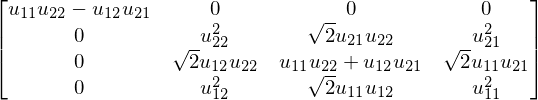

In [26]:
U=Matrix([[u11,u12],[u21,u22]])
UU=TensorProduct(U,U)
simplify(SS**-1 * UU *SS)

the top left component is 1 again if the transformation is from $SU(2)$

We can do the same if we choose the $x$ axis as quantisation axis:

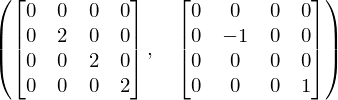

In [27]:
SS=findBasis(JJ,Jx)
SS.inv()*JJ*SS,SS.inv()*Jx*SS

The basis has the same anti-symmetric combination for the singlet, but has different combinations for the triplet.

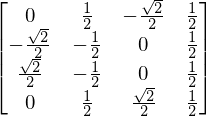

In [28]:
SS

# 3 Spin 1/2 particles 

We can do the same for the combination of 3 spin $1/2$ states. We define the total spin as the sum of the spin on the individual states.

In [29]:
J1x=TensorProduct(s1,ii,ii)
J2x=TensorProduct(ii,s1,ii)
J3x=TensorProduct(ii,ii,s1)
J1y=TensorProduct(s2,ii,ii)
J2y=TensorProduct(ii,s2,ii)
J3y=TensorProduct(ii,ii,s2)
J1z=TensorProduct(s3,ii,ii)
J2z=TensorProduct(ii,s3,ii)
J3z=TensorProduct(ii,ii,s3)

Jx=J1x+J2x+J3x
Jy=J1y+J2y+J3y
Jz=J1z+J2z+J3z

J2=Jx**2+Jy**2+Jz**2

We can also define the spin of the combination of 2 out of the 3 spins 

In [30]:
J12x=J1x+J2x
J12y=J1y+J2y
J12z=J1z+J2z

J13x=J1x+J3x
J13y=J1y+J3y
J13z=J1z+J3z

J23x=J2x+J3x
J23y=J2y+J3y
J23z=J2z+J3z

J122=J12x**2+J12y**2+J12z**2
J132=J13x**2+J13y**2+J13z**2
J232=J23x**2+J23y**2+J23z**2

First we find the basis in which $J^2$, $J_{12}^2$ and $J_z$ are diagonal

In [31]:
SS=findBasis(J2,J122,Jz)

To see what happens we can see what the $SU(2)$ transformation of each spin looks like in this basis 

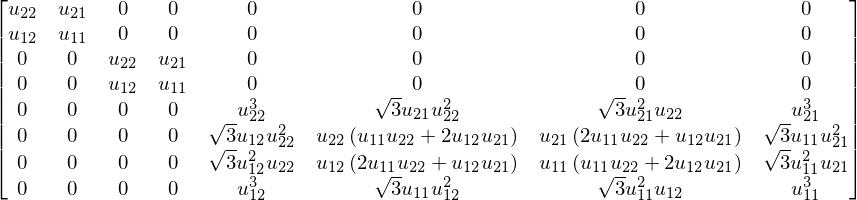

In [32]:
UU=TensorProduct(U,U,U)
di=simplify(SS**-1 * UU *SS)
di=simplify(di.subs(u11*u22-u12*u21,1))
di

We can identify two blocks of 2 states that transform together, and we can recognize that the transformation is the original transformation on one single spin $1/2$ state, and we see a block of 4 states that transform together. To help identify these blocks we can look at the value of the operators in the diagonal basis:

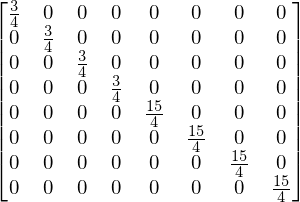

In [33]:
SS.inv()*J2*SS

We see that the total spin of the states in the two upper blocks is $1/2$ (because $1/2(1/2+1)=3/4$) and the total spin of the lowerr state is $3/2$ (because $3/2(3/2+1)=15/4$). We can look at the total spin of the first and second spin:

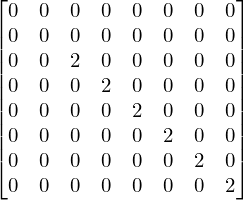

In [34]:
SS.inv()*J122*SS

We see that the first block has total spin between the first two states is $0$, the seccond group of two states has spin $1$  (because $1(1+1)=2$) between the first two states. The block of four state has spin $1$ between the two first states. We can also get the $z$ component of the states:  

In [35]:
pprint(SS.inv()*Jz*SS)

⎡-1/2   0    0     0    0     0     0    0 ⎤
⎢                                          ⎥
⎢ 0    1/2   0     0    0     0     0    0 ⎥
⎢                                          ⎥
⎢ 0     0   -1/2   0    0     0     0    0 ⎥
⎢                                          ⎥
⎢ 0     0    0    1/2   0     0     0    0 ⎥
⎢                                          ⎥
⎢ 0     0    0     0   -3/2   0     0    0 ⎥
⎢                                          ⎥
⎢ 0     0    0     0    0    -1/2   0    0 ⎥
⎢                                          ⎥
⎢ 0     0    0     0    0     0    1/2   0 ⎥
⎢                                          ⎥
⎣ 0     0    0     0    0     0     0   3/2⎦


# SU(3)

Now we consider the group of transformation of three objects instead of two. The equivalent to the pauli matrices for this group are the Gell-Mann matrices 

In [36]:
iii=Matrix([[1,0,0],[0,1,0],[0,0,1]])
gellmann=[
    Matrix([[0,1,0],[1,0,0],[0,0,0]]),
    Matrix([[0,-I,0],[I,0,0],[0,0,0]]),
    Matrix([[1,0,0],[0,-1,0],[0,0,0]]),
    Matrix([[0,0,1],[0,0,0],[1,0,0]]),
    Matrix([[0,0,-I],[0,0,0],[I,0,0]]),
    Matrix([[0,0,0],[0,0,1],[0,1,0]]),
    Matrix([[0,0,0],[0,0,-I],[0,I,0]]),
    1/sympy.sqrt(3)*Matrix([[1,0,0],[0,1,0],[0,0,-2]])
]
gs=[g/2 for g in gellmann]

We want to look at the combination of a set of 3 states and a set of complex conjugated states. The first is transformed by a matrix $U$ and the second by the its hermitian conjugate. Since we want the transformation to be unitary we have 

$UU^+=1 \quad\Rightarrow\quad U^{-1}=U^+$

and we restrict the transformation to those for which $\det U=1$ because we are not interested in pure phase transformations.

In [37]:
U=Matrix([[u11,u12,u13],[u21,u22,u23],[u31,u32,u33]])
det=U.det()    
Ubar=simplify(det*U**-1)  # I can multiply by the determinant because it is one
Ubar=Matrix(Ubar)  # needed so the matrix is not immutable

The equivalent of the $\vec J$ operator in the spin for $SU(3)$ is given by the vector whose components are the gell-Mann matrices. We can use the square of this vector to help find a basis that makes the transformation behaviour of the combination explicit  

In [38]:
FF=__builtin__.sum([TensorProduct(g,g.conjugate()) for g in gs],sympy.zeros(9))
SS=findBasis(FF)

We can now see the form of the transformation matrix for the tensor state. It is a bit ugly but we see that we get a block of eight states that transform into each other and one single state that is invariant.

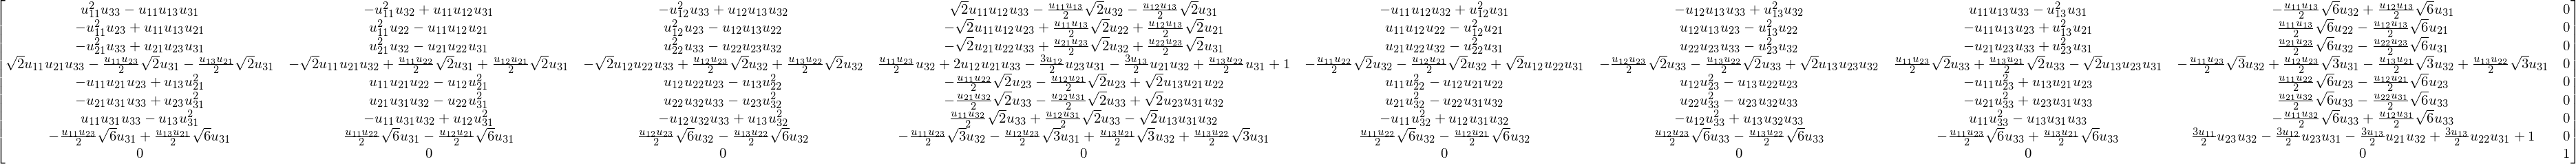

In [39]:
UUbar=TensorProduct(U,Ubar.transpose())
u=SS**-1 * UUbar *SS
expand(expand(u).subs(u11*u22*u33,1-(det-u11*u22*u33)))

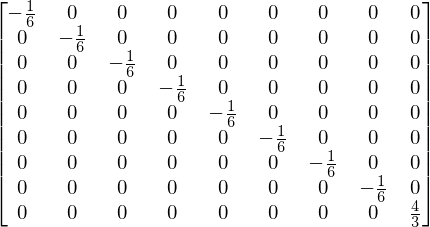

In [40]:
SS.inv()*FF*SS

We see that we have a group of 8 states and a single state. The eigenvalue for this single state is the factor 4/3 that entered some formulae for the quark-antiquark potential.

# meson flavour octet

Now we look at the meson octed, for this we have three flavours of quarks $u$, $d$ and $s$, related by an approximate symmetry. We want the states to be grouped into sets that transform together under rotations in flavour space, that is states with the same eigenvalue of $FF$. We want to separate them in states with definite electric charge so we need to define the charge operator. If we work in the basis where the $u$ component is the first component, the $d$ component the second and the $s$ component the third, the charge operator can be written as 

$q=\left(\begin{array}{ccc}2/3&0&0\\0&-1/3 &0\\0&0&-1/3\end{array}\right)$

for the quarks and $-q$ for the anti-quarks. The charge operator for tensor states is the tensor product

$Q==q\otimes \mathbf{1}+\mathbf{1}\otimes (-q)$

In [41]:
FF=__builtin__.sum([TensorProduct(g,g.conjugate()) for g in gs],sympy.zeros(9))
q=Matrix([[2,0,0],[0,-1,0],[0,0,-1]])/3
Q=TensorProduct(q,iii)-TensorProduct(iii,q)

We also want to have a basis of states with fixed isospins so we need to define the isospin operator. We can see that the three components of the isospin operator are the first three Gell-Mann matrices. To obtain the isospin matrices for the conjugate states we need to change from the $\bar u$,$\bar d$ basis to the $(-\bar d,\bar u )$ basis as explained in the notes, this is achieved by sandwiching the isospin operators with the matrix 

$\left(\begin{array}{ccc}0&1&0\\-1&0&0\\0&0&0\end{array}\right)$

In [42]:
g2=Matrix([
[ 0, 1, 0],
[-1, 0, 0],
[ 0, 0, 0]])
ixcc=g2.transpose()*gs[0]*g2
iycc=g2.transpose()*gs[1]*g2
izcc=g2.transpose()*gs[2]*g2

The isospin operator of the tensor product state is given by the sum of the isospin of the quark and the antiquark.

In [43]:
Ix=TensorProduct(gs[0],iii)+TensorProduct(iii,ixcc)
Iy=TensorProduct(gs[1],iii)+TensorProduct(iii,iycc)
Iz=TensorProduct(gs[2],iii)+TensorProduct(iii,izcc)
I2=Ix*Ix+Iy*Iy+Iz*Iz

We can introduce the strnagness operator:

In [44]:
St=Matrix([[0,0,0],[0,0,0],[0,0,-1]])
Strangeness=TensorProduct(St,iii)-TensorProduct(iii,St)

Now we find a basis where all operators are diagonal

In [45]:
SS=findBasis(FF,I2,Strangeness,Iz,Q)

The eigenvalues of $FF$ show that the eight first eigenstates are part of an octet, the last is a singlet:

In [46]:
pprint(SS.inv()*FF*SS)

⎡-1/6   0     0     0     0     0     0     0     0 ⎤
⎢                                                   ⎥
⎢ 0    -1/6   0     0     0     0     0     0     0 ⎥
⎢                                                   ⎥
⎢ 0     0    -1/6   0     0     0     0     0     0 ⎥
⎢                                                   ⎥
⎢ 0     0     0    -1/6   0     0     0     0     0 ⎥
⎢                                                   ⎥
⎢ 0     0     0     0    -1/6   0     0     0     0 ⎥
⎢                                                   ⎥
⎢ 0     0     0     0     0    -1/6   0     0     0 ⎥
⎢                                                   ⎥
⎢ 0     0     0     0     0     0    -1/6   0     0 ⎥
⎢                                                   ⎥
⎢ 0     0     0     0     0     0     0    -1/6   0 ⎥
⎢                                                   ⎥
⎣ 0     0     0     0     0     0     0     0    4/3⎦


The eigenvalues of the isospin squared show that we have two isospin $1/2$, on isospin $1$ and two singlets 

In [47]:
I2Diag=SS.inv()*I2*SS
IzDiag=SS.inv()*Iz*SS
pprint([I2Diag,IzDiag])

⎡⎡0   0    0    0    0   0  0  0  0⎤, ⎡0   0     0    0     0   0   0  0  0⎤⎤
⎢⎢                                 ⎥  ⎢                                    ⎥⎥
⎢⎢0  3/4   0    0    0   0  0  0  0⎥  ⎢0  -1/2   0    0     0   0   0  0  0⎥⎥
⎢⎢                                 ⎥  ⎢                                    ⎥⎥
⎢⎢0   0   3/4   0    0   0  0  0  0⎥  ⎢0   0    1/2   0     0   0   0  0  0⎥⎥
⎢⎢                                 ⎥  ⎢                                    ⎥⎥
⎢⎢0   0    0   3/4   0   0  0  0  0⎥  ⎢0   0     0   -1/2   0   0   0  0  0⎥⎥
⎢⎢                                 ⎥  ⎢                                    ⎥⎥
⎢⎢0   0    0    0   3/4  0  0  0  0⎥  ⎢0   0     0    0    1/2  0   0  0  0⎥⎥
⎢⎢                                 ⎥  ⎢                                    ⎥⎥
⎢⎢0   0    0    0    0   2  0  0  0⎥  ⎢0   0     0    0     0   -1  0  0  0⎥⎥
⎢⎢                                 ⎥  ⎢                                    ⎥⎥
⎢⎢0   0    0    0    0   0  2  0  0⎥  ⎢0   0     0    0     0   

The charges and strangeness are the following

In [48]:
QDiag=SS.inv()*Q*SS
StrDiag=SS.inv()*Strangeness*SS
pprint([QDiag,StrDiag])

⎡⎡0  0   0  0  0  0   0  0  0⎤, ⎡0  0   0   0  0  0  0  0  0⎤⎤
⎢⎢                           ⎥  ⎢                           ⎥⎥
⎢⎢0  -1  0  0  0  0   0  0  0⎥  ⎢0  -1  0   0  0  0  0  0  0⎥⎥
⎢⎢                           ⎥  ⎢                           ⎥⎥
⎢⎢0  0   0  0  0  0   0  0  0⎥  ⎢0  0   -1  0  0  0  0  0  0⎥⎥
⎢⎢                           ⎥  ⎢                           ⎥⎥
⎢⎢0  0   0  0  0  0   0  0  0⎥  ⎢0  0   0   1  0  0  0  0  0⎥⎥
⎢⎢                           ⎥  ⎢                           ⎥⎥
⎢⎢0  0   0  0  1  0   0  0  0⎥  ⎢0  0   0   0  1  0  0  0  0⎥⎥
⎢⎢                           ⎥  ⎢                           ⎥⎥
⎢⎢0  0   0  0  0  -1  0  0  0⎥  ⎢0  0   0   0  0  0  0  0  0⎥⎥
⎢⎢                           ⎥  ⎢                           ⎥⎥
⎢⎢0  0   0  0  0  0   0  0  0⎥  ⎢0  0   0   0  0  0  0  0  0⎥⎥
⎢⎢                           ⎥  ⎢                           ⎥⎥
⎢⎢0  0   0  0  0  0   0  1  0⎥  ⎢0  0   0   0  0  0  0  0  0⎥⎥
⎢⎢                           ⎥  ⎢                      

The components of the eigenvectors are the columns of the $SS$ matrix:

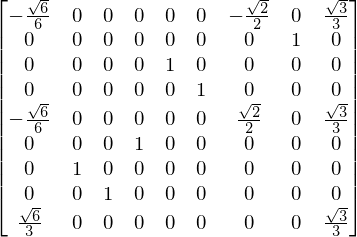

In [49]:
SS

In [50]:
u,d,s=symbols('u,d,s',Commutative=False)
ub,db,sb=symbols('ubar,dbar,sbar',commutative=False)
quarks=Matrix([[u,d,s]]).transpose()
antiquarks=Matrix([[ub,db,sb]]).transpose()
tensorState=quarks=TensorProduct(quarks,antiquarks)

tab=[]
for i in range(SS.shape[0]):
    wf=(tensorState.transpose()*SS[:,i])[0,0]
    i2=I2Diag[i,i]
    ii=(sympy.sqrt(1+4*i2)-1)/2
    iz=IzDiag[i,i]
    q=QDiag[i,i]
    strang=StrDiag[i,i]
    tab.append([simplify(wf),q,ii,iz,strang])

pd.DataFrame(tab,columns=['Wave function','Charge','I','$I_3$','Strangeness'])

,Wave function,Charge,I,$I_3$,Strangeness
0,sqrt(6)*(-d*dbar + 2*s*sbar - u*ubar)/6,0,0,0,0
1,s*ubar,-1,1/2,-1/2,-1
2,s*dbar,0,1/2,1/2,-1
3,d*sbar,0,1/2,-1/2,1
4,u*sbar,1,1/2,1/2,1
5,d*ubar,-1,1,-1,0
6,sqrt(2)*(d*dbar - u*ubar)/2,0,1,0,0
7,u*dbar,1,1,1,0
8,sqrt(3)*(d*dbar + s*sbar + u*ubar)/3,0,0,0,0


We can now assign the name of the particles

In [51]:
pd.DataFrame(tab,columns=['Wave function','Charge','I','$I_3$','Strangeness'],
            index=[r'$\eta$','$K^-$',r'$\bar K^0$','$K^0$','$K^+$','$\pi^-$','$\pi^0$','$\pi^+$',r"$\eta'$"])

,Wave function,Charge,I,$I_3$,Strangeness
$\eta$,sqrt(6)*(-d*dbar + 2*s*sbar - u*ubar)/6,0,0,0,0
$K^-$,s*ubar,-1,1/2,-1/2,-1
$\bar K^0$,s*dbar,0,1/2,1/2,-1
$K^0$,d*sbar,0,1/2,-1/2,1
$K^+$,u*sbar,1,1/2,1/2,1
$\pi^-$,d*ubar,-1,1,-1,0
$\pi^0$,sqrt(2)*(d*dbar - u*ubar)/2,0,1,0,0
$\pi^+$,u*dbar,1,1,1,0
$\eta'$,sqrt(3)*(d*dbar + s*sbar + u*ubar)/3,0,0,0,0
